# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def MCP_Neurons_AND(X1, X2, T):

    assert len(X1) == len(X2)

    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):

    assert len(X1) == len(X2)

    state_neuron = []
    for i in range(len(X1)):
        if X1[i] + X2[i] >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron



In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (Ensure the file path is correct)
df_0_1 = pd.read_csv("mnist_0_and_1.csv")  # Update with the correct path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).to_numpy()  # Convert to NumPy array explicitly
y = df_0_1["label"].to_numpy()  # Convert labels to NumPy array

# Check the shape of the features and labels
print(f"Feature matrix shape: {X.shape}")  # Should be (num_samples, 784)
print(f"Label vector shape: {y.shape}")  # Should be (num_samples,)


Feature matrix shape: (6964, 784)
Label vector shape: (6964,)


### Viewing the Dataset.

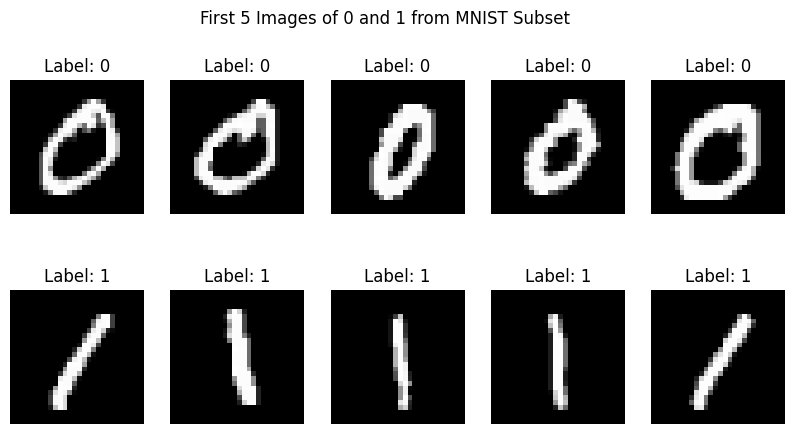

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):

    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all


## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):

    accuracy = 0

    for _ in range(epochs):
        correct = 0
        for i in range(len(X)):
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0
            error = y[i] - y_pred
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            if error == 0:
                correct += 1
        accuracy = correct

    return weights, bias, accuracy


## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  3218


## Step 5: Visualize Misclassified Images

Final Accuracy: 0.4621


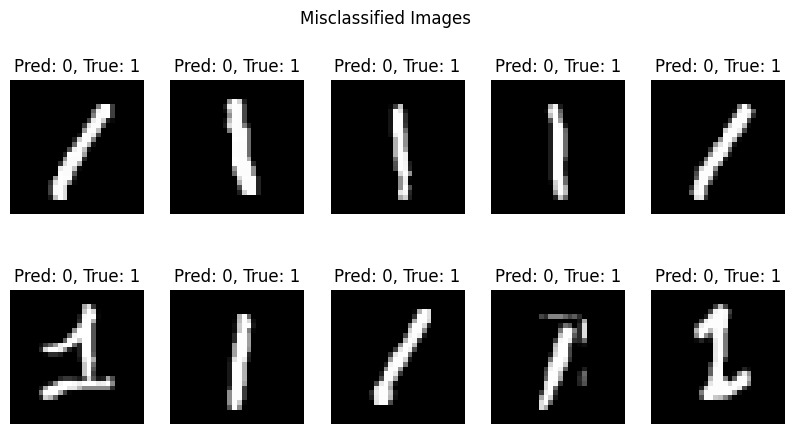

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

#Task 3: Perceptron Algorithm for 3 vs 5 Classification.

#MCP Neuron for AND & OR

In [ ]:
def MCP_Neurons_AND(X1, X2, T):

    assert len(X1) == len(X2)
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):

    assert len(X1) == len(X2)
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


#Loading the MNIST 3 vs 5 Dataset

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/mnist_3_and_5.csv")

# Map labels: 3 → 0, 5 → 1
df['label'] = df['label'].map({3: 0, 5: 1})

# Split features and labels
X = df.drop('label', axis=1).values  # shape: (n_samples, 784)
y = df['label'].values               # shape: (n_samples,)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)



Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


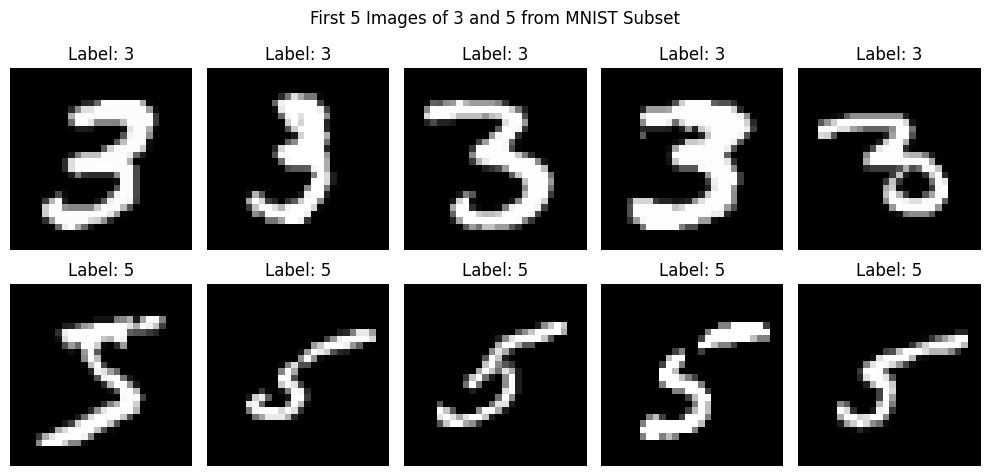

In [ ]:
# Separate images for label 3 and label 5 (now mapped as 0 and 1)
images_3 = X[y == 0]  # Originally digit 3
images_5 = X[y == 1]  # Originally digit 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have at least 5 images
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.tight_layout()
    plt.show()


#Initialize Weights and Bias

In [ ]:
np.random.seed(42)
weights = np.random.rand(X.shape[1])  # Random weights for 784 features
bias = 0.0


#Decision Function

In [ ]:
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all


# Perceptron Learning Algorithm

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=10):
    accuracy = 0
    for _ in range(epochs):
        correct = 0
        for i in range(len(X)):
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0
            error = y[i] - y_pred
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            if error == 0:
                correct += 1
        accuracy = correct
    return weights, bias, accuracy


# Train Perceptron

In [ ]:
weights, bias, accuracy = train_perceptron(X, y, weights, bias, epochs=10)
print(f"Correct Predictions in Final Epoch: {accuracy}/{len(X)}")


Correct Predictions in Final Epoch: 3218/6964


# Predict and Find Misclassified Samples

In [ ]:
y_pred = decision_function(X, weights, bias)
misclassified_indices = np.where(y_pred != y)[0]
print(f"Total Misclassified Samples: {len(misclassified_indices)}")


Total Misclassified Samples: 3746


# Visualize Misclassified Images

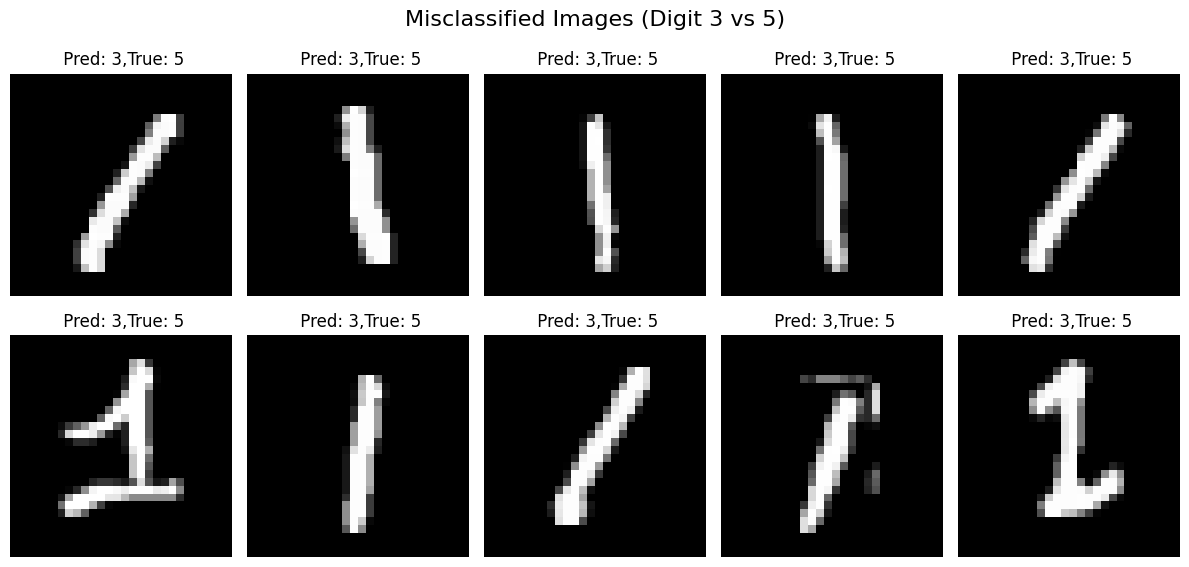

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    img = X[idx].reshape(28, 28)
    true_label = 3 if y[idx] == 0 else 5
    pred_label = 3 if y_pred[idx] ==0 else 5

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f' Pred: {pred_label},True: {true_label}')
    plt.axis('off')

plt.suptitle('Misclassified Images (Digit 3 vs 5)', fontsize=16)
plt.tight_layout()
plt.show()
